# Logistic Regression Sentiment Analysis - Shopee Review
This notebook performs sentiment analysis using Logistic Regression on Shopee review data.

In [ ]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
import nltk


In [14]:
# Download stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('indonesian')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:

# ====================
# 1. Preprocessing
# ====================
def clean_text(text):
    if not isinstance(text, str):
        return ""
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

In [16]:

# ====================
# 2. Load & Clean Dataset
# ====================
# df = pd.read_csv("../scraping-result/dataset.csv")
df = pd.read_csv("../dataset/test-dataset.csv")
df.dropna(subset=["Review", "Rating"], inplace=True)
df["Label"] = df["Rating"].apply(lambda x: 1 if x >= 4 else 0)
df["CleanReview"] = df["Review"].apply(clean_text)

In [17]:

# ====================
# 3. Vectorization & Model Training
# ====================
vectorizer = TfidfVectorizer(stop_words=stop_words)
X = vectorizer.fit_transform(df["CleanReview"])
y = df["Label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train, y_train)

d:\ulasCheck\venv\lib\site-packages\sklearn\feature_extraction\text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  warnings.warn(


LogisticRegression(class_weight='balanced', max_iter=1000)


=== CLASSIFICATION REPORT ===
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       195
           1       1.00      0.99      1.00      1753

    accuracy                           0.99      1948
   macro avg       0.97      0.99      0.98      1948
weighted avg       0.99      0.99      0.99      1948



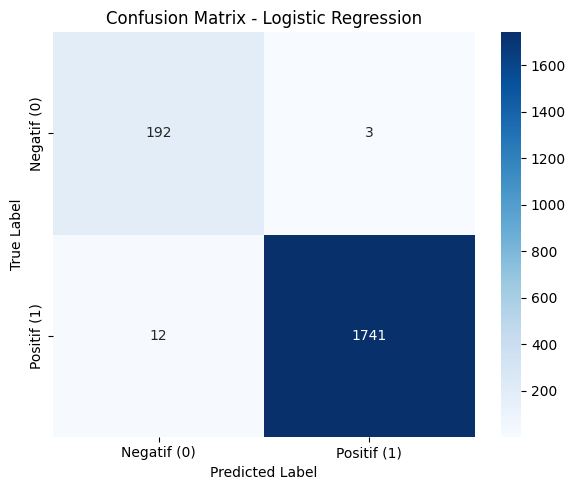

In [18]:

# ====================
# 4. Evaluation + Confusion Matrix
# ====================
y_pred = model.predict(X_test)
print("\n=== CLASSIFICATION REPORT ===")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
labels = ["Negatif (0)", "Positif (1)"]
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

In [19]:

# ====================
# 5. Prediksi Semua Data
# ====================
df["PredictedLabel"] = model.predict(X)

In [20]:

# ====================
# 6. Analisis Aspek POSITIF SAJA
# ====================
def analisis_aspek_positif(df, review_col='CleanReview', label_col='PredictedLabel'):
    # aspek_keywords = {
    #     "pengiriman": ["pengiriman", "kirim", "datang","pengantar", "kurir", "antar", "sampai", "cepat", "lama", "lambat", "resi", "sampe"],
    #     "pelayanan": ["pelayanan", "", "gercep", "layanan", "cs", "customer service", "respon", "tanggapan", "ramah", "komplain", "balas", "sopan", "cepat"],
    #     "produk": ["produk", "cocok" "barang", "kualitas", "baik", "bagus", "asli", "ori", "original", "wangi", "recommend"],
    #     "harga": ["harga", "murah", "diskon", "promo", "potongan", "worth it", "sesuai", "value", "terjangkau"],
    #     "packing": ["packing", "paket", "bungkus", "kemasan", "wrap", "bubble", "rapi", "aman", "dus", "kotak", "plastik"]
    # }
    aspek_keywords = {
    "pengiriman": [
        "pengiriman", "kirim", "dikirim", "sampai", "datang", "pengantar", "kurir", "antar", 
        "cepat", "tepat waktu", "on time", "kilat", "ekspres", "langsung sampai", 
        "sampainya cepat", "proses cepat", "pengiriman bagus", "pengiriman mantap",
        "nggak pake lama", "gak lama", "gak nunggu lama", "pengiriman lancar"
    ],
    "pelayanan": [
        "pelayanan", "Terima Kasih", "Trima Kasih", "Terimakasih",
        "Makasih", "Thankyou", "Thank You", "terima kasih", "Terima kasih",
        "layanan", "gercep", "cs", "customer service", "respon cepat", 
        "respon baik", "fast response", "tanggap", "ramah", "sopan", "baik", 
        "melayani dengan baik", "bales cepat", "komunikatif", "dilayani dengan ramah", 
        "responsif", "balesnya cepet", "admin baik", "admin ramah", "penjual baik", 
        "penjual ramah", "penjual fast respon", "seller komunikatif", "penjual responsif"
    ],
    "produk": [
        "produk", "barang", "kualitas bagus", "kualitas oke", "bagus", "asli", "ori", 
        "original", "wangi", "bersih", "tidak cacat", "awet", "tahan lama", "kuat", 
        "baik", "sesuai deskripsi", "mirip foto", "real pict", "real picture", "tidak mengecewakan", 
        "top", "mantap", "mantul", "bagus banget", "bagus bgt", "rekomendasi", "recommended", 
        "puas", "memuaskan", "worth it", "value for money", "barang oke", "barang keren",
        "empuk", "nyaman", "enak", "utuh"
    ],
    "harga": [
        "harga", "murah", "diskon", "promo", "potongan", "harga oke", "harga pas", 
        "worth it", "sesuai harga", "value", "value for money", "terjangkau", "hemat", 
        "ekonomis", "harga bersaing", "best deal", "murmer", "murah meriah", 
        "harga mantap", "harganya oke", "harga murah", "good price", "harga bersahabat"
    ],
    "packing": [
        "packing", "paket", "bungkus", "kemasan", "wrap", "bubble wrap", "bubble", 
        "rapi", "aman", "packing aman", "packing rapi", "pengemasan bagus", 
        "pengemasan rapi", "bungkus rapi", "kemasan aman", "kotak rapi", "plastik aman", 
        "dus bagus", "dibungkus rapi", "packing mantap", "packing oke", "packing double", 
        "anti pecah", "aman banget", "packingnya bagus", "dilapisi bubble wrap"
    ]
}


    aspek_counter = defaultdict(int)
    for _, row in df.iterrows():
        if row[label_col] == 1:  # hanya ulasan positif
            review = row[review_col]
            for aspek, keywords in aspek_keywords.items():
                if any(kw in review for kw in keywords):
                    aspek_counter[aspek] += 1
    return aspek_counter

In [21]:

# ====================
# 7. Evaluasi Toko Berdasarkan Aspek Positif
# ====================
total_pos = (df["PredictedLabel"] == 1).sum()
total_neg = (df["PredictedLabel"] == 0).sum()
total_all = total_pos + total_neg
persen_pos = round((total_pos / total_all) * 100, 2)

toko_label = "Direkomendasikan" if persen_pos >= 60 else "Tidak Direkomendasikan"

aspek_result = analisis_aspek_positif(df)
aspek_tertinggi = max(aspek_result, key=aspek_result.get)
jumlah_tertinggi = aspek_result[aspek_tertinggi]
persen_tertinggi = round((jumlah_tertinggi / total_all) * 100, 2)

In [22]:

# ====================
# 8. Ringkasan
# ====================
print("\n=== PENILAIAN TOKO ===")
print(f"- Total Ulasan: {total_all}")
print(f"- Positif: {total_pos} ({persen_pos}%)")
print(f"- Negatif: {total_neg} ({round((total_neg / total_all) * 100, 2)}%)")
print(f"- Label Toko: {toko_label}")
print(f"- Aspek yang menonjol (positif): '{aspek_tertinggi}' sebanyak {jumlah_tertinggi} review ({persen_tertinggi}%).")


=== PENILAIAN TOKO ===
- Total Ulasan: 9739
- Positif: 8622 (88.53%)
- Negatif: 1117 (11.47%)
- Label Toko: Direkomendasikan
- Aspek yang menonjol (positif): 'produk' sebanyak 6600 review (67.77%).


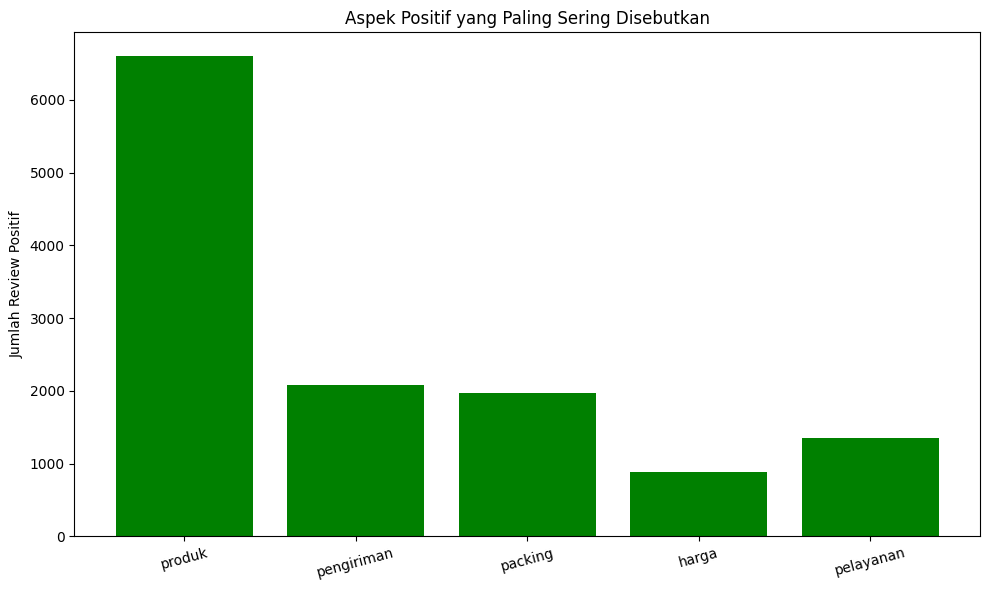

In [23]:

# ====================
# 9. Visualisasi Aspek Positif
# ====================
labels = list(aspek_result.keys())
counts = [aspek_result[k] for k in labels]

plt.figure(figsize=(10, 6))
plt.bar(labels, counts, color='green')
plt.ylabel("Jumlah Review Positif")
plt.title("Aspek Positif yang Paling Sering Disebutkan")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


In [24]:
# ====================
# 10. Lihat Kata-Kata TF-IDF Tertinggi
# ====================
import numpy as np

# Jumlah rata-rata skor tiap kata
tfidf_mean = np.asarray(X.mean(axis=0)).ravel()
tfidf_vocab = vectorizer.get_feature_names_out()

# Urutkan dari tertinggi
top_n = 10
top_indices = tfidf_mean.argsort()[::-1][:top_n]
top_words = [(tfidf_vocab[i], tfidf_mean[i]) for i in top_indices]

print("\n=== 10 Kata dengan Skor TF-IDF Tertinggi ===")
for word, score in top_words:
    print(f"{word}: {score:.4f}")


=== 10 Kata dengan Skor TF-IDF Tertinggi ===
cepat: 0.0741
barang: 0.0642
kualitas: 0.0614
sesuai: 0.0599
produk: 0.0594
banget: 0.0591
puas: 0.0589
aman: 0.0537
packing: 0.0521
penjual: 0.0462
